In [1]:
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\DATA PELATIHAN\Cleaned_data.csv")

df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
1,M,26.0,4.500000,62.0,4.900000,3.7,1.4,1.1,2.1,0.600000,23.0,N
2,F,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
3,F,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
4,M,33.0,7.100000,46.0,4.900000,4.9,1.0,0.8,2.0,0.400000,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,M,55.0,5.131094,62.0,6.800000,5.3,2.0,1.0,3.5,0.900000,30.1,Y
1005,M,55.0,4.800000,88.0,8.284155,5.7,4.0,0.9,3.3,1.800000,30.0,Y
1006,M,62.0,6.300000,82.0,6.700000,5.3,2.0,1.0,3.5,1.850595,30.1,Y
1007,F,57.0,4.100000,70.0,9.300000,5.3,3.3,1.0,1.4,1.300000,29.0,Y


## Quantum Support Vektor Machine

In [3]:
features = df[["Urea","Cr", "HbA1c","Chol", "TG", "HDL", "LDL","VLDL", "BMI"]]
labels = df["Gender"]

In [4]:
# Melakukan standarisasi fitur
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [5]:
# Melakukan encoding label menjadi bilangan bulat
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [6]:
# Membagi dataset menjadi data latihan dan data uji
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [7]:
# Menginisialisasi objek QuantumKernel
feature_dim = len(train_features[0])
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2)
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
kernel = QuantumKernel(feature_map, quantum_instance=quantum_instance)

C:\Users\Asani\AppData\Local\Temp\ipykernel_5368\3673794160.py:5: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend)


In [8]:
# Menginisialisasi model VQC
vqc = VQC(optimizer=None, feature_map=feature_map, quantum_instance=quantum_instance)

C:\Users\Asani\AppData\Local\Temp\ipykernel_5368\4276740726.py:2: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(optimizer=None, feature_map=feature_map, quantum_instance=quantum_instance)


In [ ]:
# Melatih model VQC
vqc.fit(train_features, train_labels)

# Memprediksi label dari data uji
predictions = vqc.predict(test_features)

# Melakukan decoding label menjadi Gender
predicted_labels = label_encoder.inverse_transform(predictions)

In [ ]:
# Menghitung akurasi prediksi
accuracy = np.mean(predicted_labels == test_labels)
print("Akurasi:", accuracy)

## Vektor Support Machine Classic (VSMC)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [10]:
df.drop('Gender', axis=1, inplace=True)

df

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
1,26.0,4.500000,62.0,4.900000,3.7,1.4,1.1,2.1,0.600000,23.0,N
2,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
3,50.0,4.700000,46.0,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
4,33.0,7.100000,46.0,4.900000,4.9,1.0,0.8,2.0,0.400000,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...
1004,55.0,5.131094,62.0,6.800000,5.3,2.0,1.0,3.5,0.900000,30.1,Y
1005,55.0,4.800000,88.0,8.284155,5.7,4.0,0.9,3.3,1.800000,30.0,Y
1006,62.0,6.300000,82.0,6.700000,5.3,2.0,1.0,3.5,1.850595,30.1,Y
1007,57.0,4.100000,70.0,9.300000,5.3,3.3,1.0,1.4,1.300000,29.0,Y


## EDA Data

In [11]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder
le = LabelEncoder()
df['CLASS'] = le.fit_transform(df['CLASS'])

## Splitting Data

In [12]:
X_SVM = df.drop(columns="CLASS")
y_SVM =df.CLASS

X_train, X_test, y_train, y_test = train_test_split(X_SVM, y_SVM, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((807, 10), (202, 10), (807,), (202,))

## Training Model

In [14]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']),
])

In [15]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

In [16]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.svm_params, cv=3,  n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 10.0, 'algo__gamma': 0.001}
0.7478919895511005 0.5904809581529442 0.7248478199215135


c:\Users\Asani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Kesimpulan 

## Tingkatkan performa Model
- Menggunakan Feature Importance
- Menggunakan Tunning Model
- Menggunakan Polynomial

## Menggunakan Feature importance

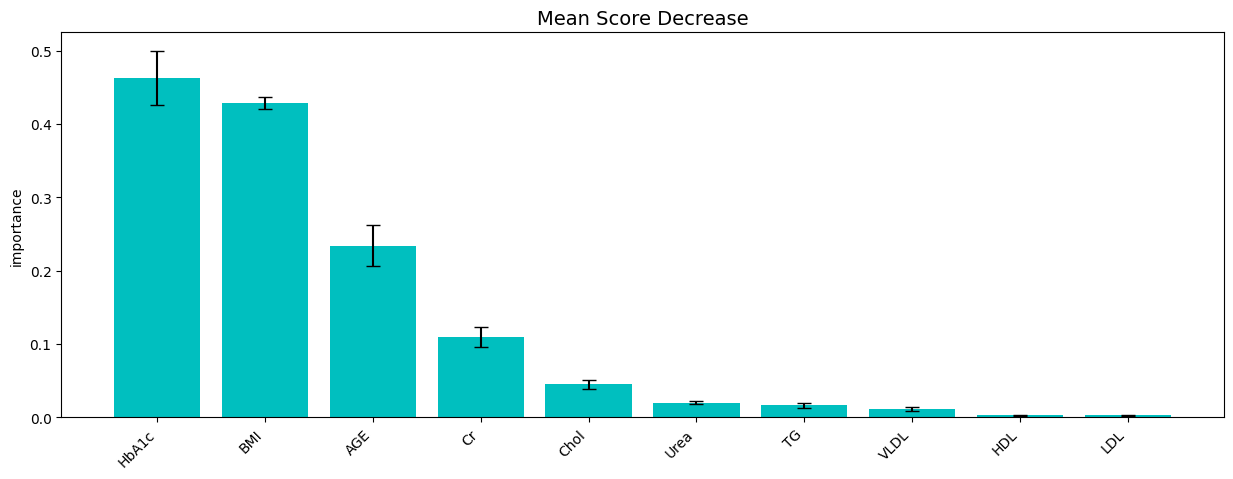

In [71]:
f_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [22]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['AGE', 'Cr', 'HbA1c', 'Chol', 'BMI']),
])

In [23]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

In [24]:
model = GridSearchCV(pipeline, gsp.svm_params, cv=3,  n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 10.0, 'algo__gamma': 0.001}
0.7023148715348304 0.5842120143515215 0.6932094885833469


c:\Users\Asani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Menggunakan polinomial dan Scalling pada model

In [49]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='maxabs'), ['AGE', 'Cr', 'HbA1c', 'Chol', 'BMI']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 1.0, 'algo__gamma': 10.0}
0.8460451232122621 0.7570188914801163 0.8281491952616509


c:\Users\Asani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
